In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
ref = 1025

x = linspace(0,1,ref)


In [22]:
n = 6
q = linspace(0,1,n)
A = zeros((n,n))

for i in range(n):
    A[:,i] = q**i
    
A

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03,
        3.2000e-04],
       [1.0000e+00, 4.0000e-01, 1.6000e-01, 6.4000e-02, 2.5600e-02,
        1.0240e-02],
       [1.0000e+00, 6.0000e-01, 3.6000e-01, 2.1600e-01, 1.2960e-01,
        7.7760e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01,
        3.2768e-01],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [23]:
def runge(x):
    return 1./(1+50*(x-.5)**2)

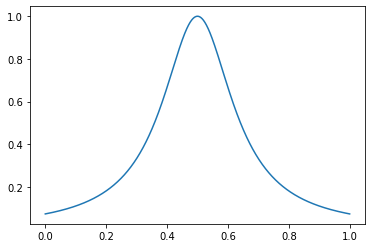

In [24]:
plot(x, runge(x))

NameError: name 'Pn' is not defined

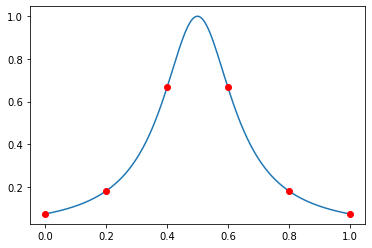

In [25]:
G = runge(q)
p = linalg.solve(A,G)
plot(x,runge(x))
plot(q,runge(q), 'ro')
plot(x, Pn.dot(p))

In [26]:
linalg.cond(A)

4924.3710566110185

In [35]:
q = linspace(0,1,n)
Ln = zeros((ref, n))
for i in range(n):
    Ln[:,i] = i
    for j in range(n):
        if j != i:
            Ln[:,i] = (x-q[i])/(q[i]-q[j])

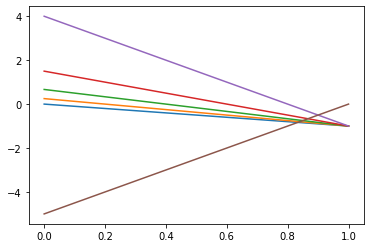

In [36]:
plot(x, Ln)

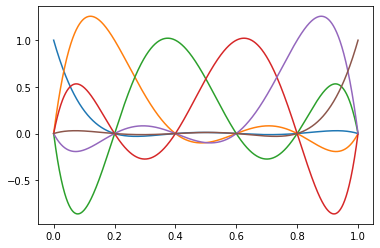

In [38]:
q = linspace(0,1,n)
Ln = zeros((ref, n))
for i in range(n):
    Ln[:,i] = 1
    for j in range(n):
        if j != i:
            Ln[:,i] *= (x-q[j])/(q[i]-q[j])
            

plot(x, Ln)

In [ ]:
def compute_langrange_basis(x, q):
    """
    Actually compute the matrix
    
    Ln[i,i]=l_j(x_i)
    
    where l_j is the j-th Langrange basis function associated to q
    """
    
    ref = len(x)
    

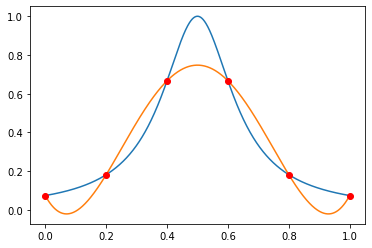

In [39]:
plot(x, runge(x))
plot(x, Ln.dot(runge(q)))
plot(q, runge(q), 'ro')


In [46]:
def interpolation(x, q, f):
    """evaluate the poly. interpolation p of f s.t. f(q[i]) = p(q[i]) at the points x"""
    ref = len(x)
    n = len(q)
    Ln = ones((ref, n))
    for i in range(n):
        for j in range(n):
            if j != i:
                Ln[:,i] *= (x-q[j])/(q[i]-q[j])
    
    return Ln.dot(f(q))

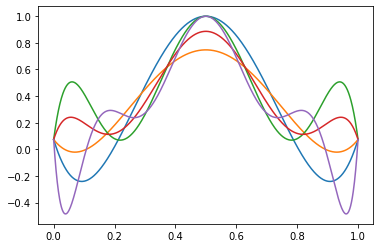

In [50]:

for n in range(5,10):
    q = linspace(0,1,n)
    p = interpolation(x, q, runge)
    plot(x, p)


In [52]:
def compute_lebesgue_function(x, q):
    """
    Compute the lebesgue function (evaluated at x) associated to the lagrange interpolation
    based on the quadratures points q
    """
    Ln = compute_lagrange_basis(x, q) //todo
    return sum(abs(Ln),axis = 1)

In [53]:
plot(x, compute_lebesgue_function(x,q))

NameError: name 'compute_lagrange_basis' is not defined

In [54]:
#MACRO; a macro because it is not self consistent, as x is something define externally
def cost_function(q):
    """
    assume x is defined globally, compute lebesgue function associatped to q (collection of points
    we are interpolating) and return its maximum on the points x
    """
    return (max(compute_lebesgue_function(x,q)))

In [ ]:
import scipy
import scipy.optimize

q = linspace(0,1,5)
qdot = scipy.optimize.minimize(cost_function,q)
